# Introduction to Julia and JuMP: Case study

In this session, we will explore the basic functionalities of Julia

### Step 1: Data import 
We will work on a credit report data set from UCI ML repository

In [10]:
using DataFrames

In [20]:
df = DataFrames.readtable("data/australian.dat.txt", header=false, separator=' ')

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
2,0,22.67,7.0,2,8,4,0.165,0,0,0,0,2,160,1,0
3,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0
4,0,21.67,11.5,1,5,3,0.0,1,1,11,1,2,0,1,1
5,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1
6,0,15.83,0.585,2,8,8,1.5,1,1,2,0,2,100,1,1
7,1,17.42,6.5,2,3,4,0.125,0,0,0,0,2,60,101,0
8,0,58.67,4.46,2,11,8,3.04,1,1,6,0,2,43,561,1
9,1,27.83,1.0,1,2,8,3.0,0,0,0,0,2,176,538,0


Let us make basic dataframes manipulation

#### Q1: rename last column (output) :x15 into :y

In [21]:
DataFrames.names(df)

15-element Array{Symbol,1}:
 :x1 
 :x2 
 :x3 
 :x4 
 :x5 
 :x6 
 :x7 
 :x8 
 :x9 
 :x10
 :x11
 :x12
 :x13
 :x14
 :x15

In [22]:
DataFrames.rename(df, (:x15 => :y))

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y
,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
2,0,22.67,7.0,2,8,4,0.165,0,0,0,0,2,160,1,0
3,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0
4,0,21.67,11.5,1,5,3,0.0,1,1,11,1,2,0,1,1
5,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1
6,0,15.83,0.585,2,8,8,1.5,1,1,2,0,2,100,1,1
7,1,17.42,6.5,2,3,4,0.125,0,0,0,0,2,60,101,0
8,0,58.67,4.46,2,11,8,3.04,1,1,6,0,2,43,561,1
9,1,27.83,1.0,1,2,8,3.0,0,0,0,0,2,176,538,0


But did not change the original table df

In [24]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
2,0,22.67,7.0,2,8,4,0.165,0,0,0,0,2,160,1,0
3,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0
4,0,21.67,11.5,1,5,3,0.0,1,1,11,1,2,0,1,1
5,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1
6,0,15.83,0.585,2,8,8,1.5,1,1,2,0,2,100,1,1
7,1,17.42,6.5,2,3,4,0.125,0,0,0,0,2,60,101,0
8,0,58.67,4.46,2,11,8,3.04,1,1,6,0,2,43,561,1
9,1,27.83,1.0,1,2,8,3.0,0,0,0,0,2,176,538,0


Suffix "!" denotes functions which modify their argument (convention only)

In [26]:
DataFrames.rename!(df, (:x15 => :y))
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y
,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
2,0,22.67,7.0,2,8,4,0.165,0,0,0,0,2,160,1,0
3,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0
4,0,21.67,11.5,1,5,3,0.0,1,1,11,1,2,0,1,1
5,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1
6,0,15.83,0.585,2,8,8,1.5,1,1,2,0,2,100,1,1
7,1,17.42,6.5,2,3,4,0.125,0,0,0,0,2,60,101,0
8,0,58.67,4.46,2,11,8,3.04,1,1,6,0,2,43,561,1
9,1,27.83,1.0,1,2,8,3.0,0,0,0,0,2,176,538,0


#### Q2: rename a list of columns (list comprehension)
We want to rename all columns :x1 up to :x14 into :input1 ... :input14

In [27]:
names(df)

15-element Array{Symbol,1}:
 :x1 
 :x2 
 :x3 
 :x4 
 :x5 
 :x6 
 :x7 
 :x8 
 :x9 
 :x10
 :x11
 :x12
 :x13
 :x14
 :y  

Similar to Python, Julia allows for list comprehension

Example:

In [28]:
[i^2 for i in 1:10]

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

Strings can be concatenated using the "*" operator

In [34]:
"hello" * " " * "world!"

"hello world!"

Strings can be converted into symbols using Symbol(...)

In [36]:
Symbol("IAP")

:IAP

In [46]:
DataFrames.rename!(df, [(Symbol("x"*string(i)) => Symbol("input"*string(i))) for i in 1:14])
df

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,y
,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
2,0,22.67,7.0,2,8,4,0.165,0,0,0,0,2,160,1,0
3,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0
4,0,21.67,11.5,1,5,3,0.0,1,1,11,1,2,0,1,1
5,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1
6,0,15.83,0.585,2,8,8,1.5,1,1,2,0,2,100,1,1
7,1,17.42,6.5,2,3,4,0.125,0,0,0,0,2,60,101,0
8,0,58.67,4.46,2,11,8,3.04,1,1,6,0,2,43,561,1
9,1,27.83,1.0,1,2,8,3.0,0,0,0,0,2,176,538,0


#### Q3: Describe the data set

In [48]:
DataFrames.describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Int64,DataType
1,input1,0.678261,0,1.0,1,,0,Int64
2,input2,31.5682,13.75,28.625,80.25,,0,Float64
3,input3,4.75872,0.0,2.75,28.0,,0,Float64
4,input4,1.76667,1,2.0,3,,0,Int64
5,input5,7.37246,1,8.0,14,,0,Int64
6,input6,4.69275,1,4.0,9,,0,Int64
7,input7,2.22341,0.0,1.0,28.5,,0,Float64
8,input8,0.523188,0,1.0,1,,0,Int64
9,input9,0.427536,0,0.0,1,,0,Int64


#### Q4: Change column type

In [247]:
df

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,y,train
,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Bool
1,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0,false
2,0,22.67,7.0,2,8,4,0.165,0,0,0,0,2,160,1,0,false
3,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0,true
4,0,21.67,11.5,1,5,3,0.0,1,1,11,1,2,0,1,1,false
5,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1,true
6,0,15.83,0.585,2,8,8,1.5,1,1,2,0,2,100,1,1,true
7,1,17.42,6.5,2,3,4,0.125,0,0,0,0,2,60,101,0,true
8,0,58.67,4.46,2,11,8,3.04,1,1,6,0,2,43,561,1,true
9,1,27.83,1.0,1,2,8,3.0,0,0,0,0,2,176,538,0,true


In [249]:
df[:y] = Float64.(df[:y])

690-element Array{Float64,1}:
 0.0
 0.0
 0.0
 1.0
 1.0
 1.0
 0.0
 1.0
 0.0
 0.0
 1.0
 1.0
 0.0
 ⋮  
 0.0
 1.0
 0.0
 0.0
 1.0
 0.0
 1.0
 1.0
 0.0
 1.0
 1.0
 1.0

In [250]:
df

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,y,train
,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64,Bool
1,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0.0,false
2,0,22.67,7.0,2,8,4,0.165,0,0,0,0,2,160,1,0.0,false
3,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0.0,true
4,0,21.67,11.5,1,5,3,0.0,1,1,11,1,2,0,1,1.0,false
5,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1.0,true
6,0,15.83,0.585,2,8,8,1.5,1,1,2,0,2,100,1,1.0,true
7,1,17.42,6.5,2,3,4,0.125,0,0,0,0,2,60,101,0.0,true
8,0,58.67,4.46,2,11,8,3.04,1,1,6,0,2,43,561,1.0,true
9,1,27.83,1.0,1,2,8,3.0,0,0,0,0,2,176,538,0.0,true


#### Q5: Split into train/test (70%/30%)

Option 1: We can sample bernouilli RVs

In [251]:
rand()

0.23872777632595765

In [252]:
rand(size(df,1)) .< .7

690-element BitArray{1}:
  true
  true
  true
  true
 false
  true
  true
  true
  true
 false
  true
  true
  true
     ⋮
 false
  true
  true
 false
  true
  true
  true
  true
  true
  true
 false
  true

In [253]:
df[:train] = rand(size(df,1)) .< .7

690-element BitArray{1}:
  true
 false
  true
  true
  true
  true
 false
 false
  true
  true
  true
 false
  true
     ⋮
  true
  true
 false
  true
  true
  true
 false
  true
  true
  true
  true
  true

In [254]:
sum(df[:train])

484

Drawback: Not exactly 70% of the data is assigned to the train set

Option 2: Select randomly exactly 70% of the whole dataset

In [255]:
using Random

In [256]:
Random.shuffle(1:size(df,1))

690-element Array{Int64,1}:
 283
 441
 517
  70
 180
 113
 105
 203
 440
 412
 172
 424
 607
   ⋮
 193
 510
 571
 298
 542
 615
 249
   5
 670
 505
 647
 357

In [257]:
Random.randperm(size(df,1))

690-element Array{Int64,1}:
 536
 199
 688
 569
 362
 627
  11
 512
 584
 436
 477
 499
 303
   ⋮
 251
 181
 235
 166
  86
  53
 282
 302
 140
  22
 292
 657

In [258]:
df[:train] = Random.randperm(size(df,1)) .<= floor(Int, size(df,1)*.7)
sum(df[:train])

482

Then divide the data into separate arrays

In [259]:
df_train = df[df[:train],:]
df_test = df[.!df[:train],:]

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,y,train
,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64,Bool
1,1,27.83,1.0,1,2,8,3.0,0,0,0,0,2,176,538,0.0,false
2,1,41.42,5.0,2,11,8,5.0,1,1,6,1,2,470,1,1.0,false
3,1,20.0,1.25,1,4,4,0.125,0,0,0,0,2,140,5,0.0,false
4,1,41.17,1.335,2,2,4,0.165,0,0,0,0,2,168,1,0.0,false
5,1,41.58,1.75,2,4,4,0.21,1,0,0,0,2,160,1,0.0,false
6,1,19.5,9.585,2,6,4,0.79,0,0,0,0,2,80,351,0.0,false
7,1,23.08,11.5,2,9,8,2.125,1,1,11,1,2,290,285,1.0,false
8,1,42.83,1.25,2,7,4,13.875,0,1,1,1,2,352,113,0.0,false
9,1,23.17,0.0,2,13,4,0.085,1,0,0,0,2,0,1,1.0,false


In [260]:
X_train = convert(Array, df_train[1:14])

482×14 Array{Union{Missing, Float64},2}:
 1.0  22.08  11.46   2.0   4.0  4.0  …  0.0   0.0  1.0  2.0  100.0  1213.0
 0.0  22.67   7.0    2.0   8.0  4.0     0.0   0.0  0.0  2.0  160.0     1.0
 0.0  29.58   1.75   1.0   4.0  4.0     0.0   0.0  1.0  2.0  280.0     1.0
 0.0  21.67  11.5    1.0   5.0  3.0     1.0  11.0  1.0  2.0    0.0     1.0
 1.0  20.17   8.17   2.0   6.0  4.0     1.0  14.0  0.0  2.0   60.0   159.0
 0.0  15.83   0.585  2.0   8.0  8.0  …  1.0   2.0  0.0  2.0  100.0     1.0
 1.0  17.42   6.5    2.0   3.0  4.0     0.0   0.0  0.0  2.0   60.0   101.0
 0.0  58.67   4.46   2.0  11.0  8.0     1.0   6.0  0.0  2.0   43.0   561.0
 0.0  55.75   7.08   2.0   4.0  8.0     1.0   3.0  1.0  2.0  100.0    51.0
 1.0  33.5    1.75   2.0  14.0  8.0     1.0   4.0  1.0  2.0  253.0   858.0
 1.0  20.67   1.25   1.0   8.0  8.0  …  1.0   3.0  1.0  2.0  140.0   211.0
 1.0  34.92   5.0    2.0  14.0  8.0     1.0   6.0  1.0  2.0    0.0  1001.0
 1.0  58.58   2.71   2.0   8.0  4.0     0.0   0.0  1.0  2.0

In [261]:
y_train = df_train[:y]

482-element Array{Float64,1}:
 0.0
 0.0
 0.0
 1.0
 1.0
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 ⋮  
 0.0
 1.0
 0.0
 0.0
 1.0
 0.0
 1.0
 1.0
 0.0
 1.0
 1.0
 1.0

In [262]:
X_test = convert(Array, df_test[1:14])
y_test = df_test[:y]

208-element Array{Float64,1}:
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 1.0
 0.0
 0.0
 1.0
 0.0
 ⋮  
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0

### Step 3: Ordinary Least Squares
Ordinary least square regression 
$$ \min_w \: \dfrac{1}{2} \| Y - X w \|_2^2$$
admits a closed-form solution
$$ w^\star = (X^T X)^{-1} X Y $$



In [277]:
using LinearAlgebra
function linearRegression(X, y)
    M = X'*X
    M = inv(M)
    return M*(X'*y)
end

linearRegression (generic function with 1 method)

In [275]:
w = linearRegression(X_train, y_train)

14-element Array{Union{Missing, Float64},1}:
 -0.0382320521123299   
 -3.8289331865242696e-5
 -0.005162729673997548 
  0.039582821493464246 
  0.01457560706630033  
 -0.0017760114453349743
  0.0049486146516989635
  0.5706760572479913   
  0.15426218333775107  
  0.007967018192317635 
 -0.05694519525341613  
 -0.00770086343394413  
 -0.000259891304885199 
  1.1704478378411655e-5

Timing

In [333]:
@time linearRegression(X_train, y_train)

  0.000310 seconds (13 allocations: 13.453 KiB)


14-element Array{Union{Missing, Float64},1}:
 -0.03823205211232969   
 -3.8289331865211254e-5 
 -0.005162729673997598  
  0.039582821493463996  
  0.014575607066300334  
 -0.001776011445334797  
  0.004948614651698937  
  0.5706760572479918    
  0.154262183337751     
  0.007967018192317665  
 -0.056945195253416084  
 -0.007700863433944098  
 -0.00025989130488519933
  1.170447837841166e-5  

### Step 3: Best subset selection with JuMP

Ordinary least square regression with sparsity constraint
$$ \min_w \: \dfrac{1}{2} \| Y - X w \|_2^2 \quad s.t. \quad \| w \|_0 \leqslant k$$

We can linearize the cardinality constraint by introducing and extra binary variable $s\in \{ 0,1\}^p$ and big-$M$ constraints.
$$ \min_{w, s \in \{0,1\}^p} \: \dfrac{1}{2} \| Y - X w \|_2^2 \quad s.t. \quad \sum_j s_j \leqslant k, \; |w|\leqslant M s$$

In [120]:
using JuMP, Gurobi, CPLEX, LinearAlgebra

In [166]:
function sparseRegression(X, y, k; M=10,
        verbose=true, MIPGap=1e-6, Tmax=600)

    n,p = size(X)

#     model = JuMP.Model(solver=CplexSolver(CPX_PARAM_SCRIND=1*verbose, CPX_PARAM_EPGAP=MIPGap, CPX_PARAM_TILIM=Tmax))
    model = JuMP.Model(solver=GurobiSolver(OutputFlag=1*verbose, MIPGap=MIPGap, TimeLimit=Tmax))

    #Variables
    @variable(model, w[1:p])
    @variable(model, s[i=1:p], category=:Bin)
    
    #Objective
    @objective(model, Min, LinearAlgebra.dot(y-X*w, y-X*w)/2)
    
    #Constraints
    @constraint(model, sum(s) <= k)  #sparsity
    @constraint(model, w .<= M*s)    #big-M
    @constraint(model, -w .<= M*s)   #big-M

    status = solve(model)
    
    println("Final objective value: ", getobjectivevalue(model))
    return getvalue(w), getvalue(s)
end

sparseRegression (generic function with 1 method)

An easy example: $k = p$

In [175]:
w, s = sparseRegression(X_train, y_train, 14)

Academic license - for non-commercial use only
Optimize a model with 29 rows, 28 columns and 70 nonzeros
Model has 105 quadratic objective terms
Variable types: 14 continuous, 14 integer (14 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+02, 5e+05]
  QObjective range [2e+02, 2e+10]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Found heuristic solution: objective 0.0000000
Presolve removed 29 rows and 14 columns
Presolve time: 0.00s
Presolved: 0 rows, 14 columns, 0 nonzeros
Presolved model has 105 quadratic objective terms
Variable types: 14 continuous, 0 integer (0 binary)
Presolve time: 0.00s
Presolved: 0 rows, 14 columns, 0 nonzeros
Presolved model has 105 quadratic objective terms
Root barrier log...

Ordering time: 0.00s

Barrier statistics:
 Free vars  : 13
 AA' NZ     : 7.800e+01
 Factor NZ  : 9.100e+01
 Factor

([-0.0172539, -0.000781153, -0.00422994, 0.0352977, 0.0220486, -0.00950128, 0.0148418, 0.557382, 0.0850958, 0.00803085, -0.0397398, -0.00431352, -0.000123353, 1.00465e-5], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

Make sure the big-$M$ value is not binding

In [176]:
w

14-element Array{Float64,1}:
 -0.01725387415040025   
 -0.0007811533695498696 
 -0.004229942566686518  
  0.03529773597758634   
  0.02204857545493688   
 -0.009501276944185122  
  0.014841777261613842  
  0.557381881370949     
  0.08509582497041102   
  0.008030846118842305  
 -0.03973980547765876   
 -0.004313517897148955  
 -0.00012335299295074265
  1.0046487291859307e-5 

In [177]:
any(abs.(w) .> 10)

false

The solution is trivial

In [178]:
s

14-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [179]:
LinearAlgebra.norm(w - inv(X_train'*X_train)*(X_train'*y_train))

6.210654375711913e-13

In [181]:
println("Out-of-sample performance: ", norm(X_test*w - y_test)^2/2)

Out-of-sample performance: 10.132358774723583


Another example

In [182]:
w, s = sparseRegression(X_train, y_train, 5)

Academic license - for non-commercial use only
Optimize a model with 29 rows, 28 columns and 70 nonzeros
Model has 105 quadratic objective terms
Variable types: 14 continuous, 14 integer (14 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+02, 5e+05]
  QObjective range [2e+02, 2e+10]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 5e+00]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Found heuristic solution: objective 0.0000000
Presolve time: 0.00s
Presolved: 29 rows, 28 columns, 70 nonzeros
Presolved model has 105 quadratic objective terms
Variable types: 14 continuous, 14 integer (14 binary)

Root relaxation: objective -8.872978e+01, 76 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  -88.72978    0   12    0.00000  -88.72978      

([0.0, 0.0, 0.0, 0.0, 0.0153826, 0.0, 0.0, 0.560069, 0.091543, 0.00903591, 0.0, 0.0, 0.0, 9.04507e-6], [0.0, 0.0, 0.0, 0.0, 1.0, -0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0])

In [184]:
w

14-element Array{Float64,1}:
 0.0                 
 0.0                 
 0.0                 
 0.0                 
 0.015382578467273783
 0.0                 
 0.0                 
 0.5600686240405057  
 0.09154297606750145 
 0.009035914928043514
 0.0                 
 0.0                 
 0.0                 
 9.045072429419977e-6

In [183]:
s

14-element Array{Float64,1}:
  0.0
  0.0
  0.0
  0.0
  1.0
 -0.0
  0.0
  1.0
  1.0
  1.0
  0.0
  0.0
  0.0
  1.0

In [185]:
println("Out-of-sample performance: ", norm(X_test*w - y_test)^2/2)

Out-of-sample performance: 10.132788880127833


### Step 3: Benchmark against existing methods
Julia has a growing number of packages implementing basic up to state-of-the-art statistics/ML techniques (e.g. GLM, GLMnet, LibLinear, ...). 

When this is not the case, we can also interact directly with R or Julia

In [334]:
using RCall

┌ Info: Precompiling RCall [6f49c342-dc21-5d91-9882-a32aef131414]
└ @ Base loading.jl:1189


We can easily write and compile R code with the Rstring syntaxt

In [335]:
R"1+2"

RObject{RealSxp}
[1] 3


We can use Julia objects in the R code using the "$" prefix

In [337]:
R"$df"

RObject{VecSxp}
    input1 input2 input3 input4 input5 input6 input7 input8 input9 input10
1        1  22.08 11.460      2      4      4  1.585      0      0       0
2        0  22.67  7.000      2      8      4  0.165      0      0       0
3        0  29.58  1.750      1      4      4  1.250      0      0       0
4        0  21.67 11.500      1      5      3  0.000      1      1      11
5        1  20.17  8.170      2      6      4  1.960      1      1      14
6        0  15.83  0.585      2      8      8  1.500      1      1       2
7        1  17.42  6.500      2      3      4  0.125      0      0       0
8        0  58.67  4.460      2     11      8  3.040      1      1       6
9        1  27.83  1.000      1      2      8  3.000      0      0       0
10       0  55.75  7.080      2      4      8  6.750      1      1       3
11       1  33.50  1.750      2     14      8  4.500      1      1       4
12       1  41.42  5.000      2     11      8  5.000      1      1       6
13       

So if you
- do not know how to do something in Julia
- do know how to do it in R 
- are lazy to go from one language into another 

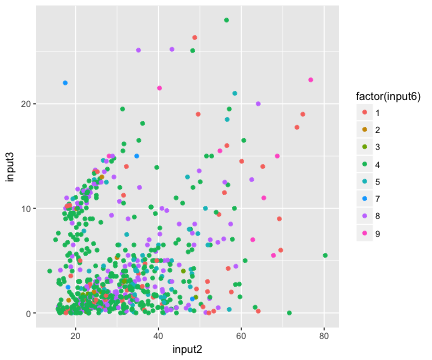

RObject{VecSxp}


In [365]:
R"""
library(dplyr)
library(ggplot2)

$df %>% 
    ggplot()+aes(x=input2, y=input3, color=factor(input6)) + geom_point()
"""